In [1]:
cd D:\Group-7

D:\Group-7


In [3]:
pwd

'D:\\Group-7'

In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata.shape

(12208178, 13)

In [8]:
parkingdata.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,Banks,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,01/10/2011 12:01:10 AM,01/10/2011 12:02:44 AM,94,2P DIS M-SUN 0:00-23:59,0,957,1667
1,Chinatown,RUSSELL STREET,BOURKE STREET,Lt COLLINS STREET,2,742E,01/10/2011 12:01:11 AM,01/10/2011 03:58:20 AM,14229,4P DIS AOT 12:00-7:30,0,1221,525
2,Courtney,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,01/10/2011 12:01:11 AM,01/10/2011 11:00:19 AM,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
3,Princes Theatre,EXHIBITION STREET,Lt BOURKE STREET,BOURKE STREET,2,452E,01/10/2011 12:01:13 AM,01/10/2011 12:37:42 AM,2189,2P DIS M-SUN 0:00-23:59,0,647,201
4,Princes Theatre,EXHIBITION STREET,BOURKE STREET,Lt COLLINS STREET,5,429W,01/10/2011 12:01:14 AM,01/10/2011 05:28:10 AM,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176
5,Hyatt,EXHIBITION STREET,Lt COLLINS STREET,COLLINS STREET,2,362E,01/10/2011 12:01:15 AM,01/10/2011 12:31:03 AM,1788,4P DIS ONLY M-SUN,0,647,175
6,County,LONSDALE STREET,KING STREET,WILLIAM STREET,4,3279S,01/10/2011 12:01:15 AM,01/10/2011 12:05:19 AM,244,2P DIS AOT 0:00-23:59,0,894,1865
7,Courtney,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4742E,01/10/2011 12:01:15 AM,01/10/2011 02:01:24 AM,7209,2P DIS M-SUN 0:00-23:59,0,627,3209
8,RACV,Lt COLLINS STREET,WILLIAM STREET,QUEEN STREET,4,2225S,01/10/2011 12:01:16 AM,01/10/2011 12:28:34 AM,1638,2P DIS M-SUN 0:00-23:59,0,911,1135
9,Princes Theatre,EXHIBITION STREET,BOURKE STREET,Lt COLLINS STREET,5,435W,01/10/2011 12:01:16 AM,01/10/2011 02:23:16 AM,8520,TKT AREA M-SUN 0:00 - 7:30,0,647,173


In [9]:
parkingdata.tail(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
12208168,Titles,QUEEN STREET,LA TROBE STREET,Lt LONSDALE STREET,2,1286E,30/09/2012 11:36:09 PM,30/09/2012 11:37:33 PM,84,2P DIS M-SUN 0:00-23:59,0,1171,5474
12208169,Princes Theatre,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,4,2843S,30/09/2012 11:36:14 PM,30/09/2012 11:49:07 PM,773,2P DIS AOT 0:00-23:59,0,894,6954
12208170,Banks,WILLIAM STREET,FLINDERS LANE,FLINDERS STREET,5,1287W,30/09/2012 11:37:33 PM,30/09/2012 11:55:03 PM,1050,2P DIS AOT 0:00-23:59,0,1428,7289
12208171,Princes Theatre,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,4,2841S,30/09/2012 11:38:59 PM,30/09/2012 11:40:04 PM,65,2P DIS AOT 0:00-23:59,0,894,5648
12208172,RACV,Lt COLLINS STREET,WILLIAM STREET,QUEEN STREET,4,2225S,30/09/2012 11:39:41 PM,30/09/2012 11:40:54 PM,73,2P DIS M-SUN 0:00-23:59,0,911,6765
12208173,Chinatown,RUSSELL STREET,Lt BOURKE STREET,BOURKE STREET,2,770E,30/09/2012 11:47:56 PM,30/09/2012 11:57:52 PM,596,2P DIS M-SUN 0:00-23:59,0,1221,7815
12208174,Chinatown,RUSSELL STREET,BOURKE STREET,Lt COLLINS STREET,5,765W,30/09/2012 11:48:34 PM,30/09/2012 11:50:02 PM,88,2P DIS M-SUN 0:00-23:59,0,1221,689
12208175,City Square,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,30/09/2012 11:48:41 PM,30/09/2012 11:51:57 PM,196,2P DIS M-SUN 0:00-23:59,0,669,6758
12208176,City Square,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1775S,30/09/2012 11:49:43 PM,30/09/2012 11:52:54 PM,191,2P DIS M-SUN 0:00-23:59,0,669,1407
12208177,Princes Theatre,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,4,2843S,30/09/2012 11:52:29 PM,30/09/2012 11:59:00 PM,391,2P DIS AOT 0:00-23:59,0,894,6954


In [11]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [19]:
#Arrival and departure times are in 12hrs format with AM/PM
#We will convert the feature to datetime type and 24hrs format getting rid of AM/PM

# chunksize = 10 ** 5
# for chunk in pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv", chunksize=chunksize):
#     parkingdata = pd.DataFrame(chunk)
#     pd.to_datetime(parkingdata["Arrival Time"]).dt.strftime('%H:%M:%S')

KeyboardInterrupt: 

In [20]:
#Checking values of Area Name feature
parkingdata['Area Name'].value_counts()

Queensberry        10160
Victoria Market     8993
The Mac             7164
Princes Theatre     7131
Hyatt               6008
Regency             5918
Titles              5373
Southbank           5028
County              4960
Rialto              4883
City Square         4814
Chinatown           4655
Courtney            4176
Hardware            4017
Banks               3855
Spencer             3785
Magistrates         3507
RACV                3122
Supreme             1891
Tavistock            485
Docklands             75
Name: Area Name, dtype: int64

In [24]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
1200000,CITY SQUARE,RUSSELL STREET,Lt COLLINS STREET,COLLINS STREET,2,694E,03/11/2011 03:36:38 PM,03/11/2011 04:07:38 PM,1860,1/2P MTR M-SAT 7:30-19:30,0,1221,523
1200001,COUNTY,SPENCER STREET,LONSDALE STREET,Lt BOURKE STREET,5,1547W,03/11/2011 03:36:38 PM,03/11/2011 03:54:10 PM,1052,P5 M-SUN 0:00-23:59,1,1285,878
1200002,HARDWARE,QUEEN STREET,Lt LONSDALE STREET,LONSDALE STREET,5,1211W,03/11/2011 03:36:41 PM,03/11/2011 04:05:05 PM,1704,1P MTR M-SAT 7:30-19:30,0,1171,711
1200003,HARDWARE,QUEEN STREET,LONSDALE STREET,Lt BOURKE STREET,1,C1186,03/11/2011 03:36:41 PM,03/11/2011 03:39:54 PM,193,1P MTR M-SAT 7:30-19:30,0,1171,747
1200004,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9325S,03/11/2011 03:36:41 PM,03/11/2011 03:38:20 PM,99,2P TKT A M-F 7:30-18:30,0,547,4039
1200005,SPENCER,BOURKE STREET,SPENCER STREET,KING STREET,4,2487S,03/11/2011 03:36:45 PM,03/11/2011 03:41:14 PM,269,1P MTR M-SAT 7:30-19:30,0,123,1458
1200006,MAGISTRATES,LA TROBE STREET,KING STREET,WILLIAM STREET,3,3930N,03/11/2011 03:36:45 PM,03/11/2011 05:37:38 PM,7253,2P TKT A M-SAT 7:30-20:30,0,856,2175
1200007,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,4,3209S,03/11/2011 03:36:45 PM,03/11/2011 03:37:54 PM,69,1P MTR M-F 9:30-19:30,0,894,2227
1200008,CITY SQUARE,RUSSELL STREET,Lt COLLINS STREET,COLLINS STREET,1,C664,03/11/2011 03:36:46 PM,03/11/2011 04:03:18 PM,1592,1P MTR M-SAT 7:30-19:30,0,1221,481
1200009,QUEENSBERRY,LEVESON STREET,QUEENSBERRY STREET,VICTORIA STREET,1,C6300,03/11/2011 03:36:47 PM,03/11/2011 06:30:00 PM,10393,4P MTR M-F 7:30-18:30,0,881,3690


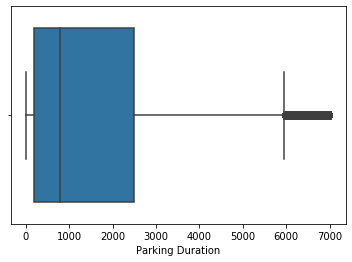

In [48]:
sns.boxplot(parkingdata['Parking Duration'])
